## Probability mass and probability density functions

Every probability distribution has either a probability mass function (if the distribution is discrete) or a probability density function (if the distribution is continuous). This function roughly indicates the probability of a sample taking a particular value. We will denote this function $P(y | \theta)$ where $y$ is the value of the sample and $\theta$ is the parameter describing the probability distribution. Written out mathematically, we have:

$$
P(y | \theta) = \text{Prob} (\text{sampling value $y$ from a distribution with parameter $\theta$}).
$$

When more than one sample is drawn *independently* from the same distribution (which we usually assume), the probability mass/density function of the sample values $y_1, \ldots, y_n$ is the product of the probability mass/density functions for each individual $y_i$. Written formally:

$$
P(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n P(y_i | \theta).
$$

## The likelihood function

Probability mass/density functions are usually considered functions of $y_1, \ldots, y_n$, with the parameter $\theta$ considered fixed. They are used when you know the parameter $\theta$ and want to know the probability of a sample taking some values $y_1, \ldots, y_n$. You use this function in *probability*, where you know the distribution and want to make deductions about possible values sampled from it.

The *likelihood* function is the same, but with the $y_1, \ldots, y_n$ considered fixed and with $\theta$ considered the independent variable. You usually use this function when you know the sample values $y_1, \ldots, y_n$ (because you've observed them by collecting data), but don't know the parameter $\theta$. You use this function in *statistics*, where you know the data and want to make inferences about the distribution they came from. 

This is an important point, so I'll repeat it: $P(y_1, \ldots, y_n | \theta)$ is called the *probability mass/density function* when considered as a function of $y_1, \ldots, y_n$ with $\theta$ fixed. It's called the *likelihood* when considered as a function of $\theta$ with $y_1, \ldots, y_n$ fixed. For the likelihood, the convention is using the letter $L$, so that

$$
\underbrace{L(y_1, \ldots, y_n | \theta)}_{\text{ likelihood,} \\ \text{function of $\theta$}} = \underbrace{P(y_1, \ldots, y_n | \theta)}_{\text{probabiliy mass/density,} \\ \text{ function of $y_1, \ldots, y_n$}}
$$

Let's see some examples of this below.

#### Bernoulli distribution

We'll start by looking at the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) with parameter $\theta$. It's the distribution of a random variable that takes value 1 with probability $\theta$ and 0 with probability $1-\theta$. Let $P(y | \theta)$ be the probability that the event returns value $y$ given parameter $\theta$. Then

$$
\begin{align}
L(y | \theta) = P(y | \theta) &= \begin{cases}
1 - \theta \quad \text{if} \, y = 0 \\
\theta \quad \quad \, \, \, \text{if} \, y = 1 \\
\end{cases} \\
&= (1 - \theta)^{1 - y} \theta^y \quad y \in \{0, 1\}
\end{align}
$$

If we assume samples are independent, we also have
$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n (1 - \theta)^{1 - y_i} \theta^{y_i}.
$$

For example, the probability of observing $0, 0, 0, 1, 0$ is

$$
L(0, 0, 0, 1, 0 | \theta) = (1 - \theta)(1 - \theta)(1 - \theta)\theta(1 - \theta) = \theta(1 - \theta)^4.
$$

Note that, in this case, we have fixed the data, and are left with a function just of $\theta$. This is called the *likelihood* function. Let's plot the likelihood as a function of $\theta$ below.

![](figures/bernoulli_likelihood.png)

#### Normal (Gaussian) distribution

This idea also generalises naturally to the [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (also called the *Gaussian* distribution). This distribution has two parameters: a mean $\mu$ and a standard deviation $\sigma$. We hence let $\theta = (\mu, \sigma)$. The probability density function (the analogue of the probability mass function for continuous distributions) is:

$$
L(y | \theta) = P(y | \theta) = P(y | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y - \mu)^2 \Big).
$$

For a sequence of independent observations $y_1, \ldots, y_n$, the likelihood is 

$$
L(y_1, \ldots, y_n | \mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Big( - \frac{1}{2 \sigma^2} (y_i - \mu)^2 \Big).
$$

The *likelihood* is hence the same, but viewed as a function of $\mu$ and $\sigma$, with $y_1, \ldots, y_n$ viewed as constants. For example, if the observed data is -1, 0, 1, the likelihood becomes

$$
L(-1, 0, 1 | \mu, \sigma) = (2 \pi \sigma^2)^{-3/2} \exp \Big( - \frac{1}{2 \sigma^2} (\mu-1)^2 + (\mu)^2 + (\mu+1)^2 \Big).
$$

which we can plot as a function of $\mu$ an $\sigma$ below.

![](figures/gaussian_likelihood.png)

## Maximum likelihood estimation

The likelihood function is commonly used in statistical inference when we are trying to fit a distribution to some data. This is usually done as follows. Suppose we have observed data $y_1, \ldots, y_n$, assumed to be from some distribution with unknown parameter $\theta$, which we want to estimate. The likelihood is

$$
L(y_1, \ldots, y_n | \theta).
$$

The *maximum likelihood estimate* $\theta_{\text{MLE}}$ of the parameter $\theta$ is then the value that maximises the likelihood $L(y_1, \ldots, y_n | \theta)$. For the example of the Bernoulli distribution with observed data 0, 0, 0, 1, 0 (as in the plot above), this gives us $p=\frac{1}{5}$, which is where the plot takes its maximum. For the normal distribution with data -1, 0, 1, this is the region where the plot is brightest (indicating the highest value), and this occurs at $\mu=0, \sigma=\sqrt{\frac{2}{3}}$. In this way, we *pick the values of the parameter that make the data we have observed the most likely*. Written in mathematical notation, this is 

$$
\theta_{\text{MLE}} = \arg \max_{\theta} L(y_1, \ldots, y_n | \theta).
$$

## The negative log-likelihood

Recall that, for independent observations, the likelihood becomes a product:

$$
L(y_1, \ldots, y_n | \theta) = \prod_{i=1}^n P(y_i | \theta).
$$

Furthermore, since the $\log$ function increases with its argument, maximising the likelihood is equivalent to maximising the log-likelihood $\log L(y_1, \ldots, y_n | \theta)$. This changes the product into a sum:

$$
\begin{align}
\theta_{\text{MLE}} &= \arg \max_{\theta} L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log L(y_1, \ldots, y_n | \theta) \\
&= \arg \max_{\theta} \log \prod_{i=1}^n L(y_i | \theta) \\
&= \arg \max_{\theta} \sum_{i=1}^n \log L(y_i | \theta).
\end{align}
$$

Furthermore, convention in optimisation is that we always *minimise* a function instead of maximising it. Hence, maximising the likelihood is equivalent to *minimising* the *negative log-likelihood*:

$$
\theta_{\text{MLE}} = \arg \min_{\theta} \text{NLL}(y_1, \ldots, y_n | \theta)
$$

where the *negative log-likelihood* NLL is defined as

$$
\text{NLL}(y_1, \ldots, y_n | \theta) = - \sum_{i=1}^n \log L(y_i | \theta).
$$

#### The sections of this reading summarise the main results of the following reference:

* D. P. Kingma and M. Welling. "Auto-Encoding Variational Bayes", 2014. https://arxiv.org/abs/1312.6114

## Latent variables and the latent variable model <a class="anchor" id="section1"></a>

A latent variable is a random variable that cannot be conditioned on for inference because its value is not known. ‘Latent’ means hidden. Latent variables do not need to correspond to real quantities. Sometimes models that outwardly do not involve latent quantities are more conveniently expressed by imagining that they do. A perfect example of this is the mixture of Gaussians model: observations can be generated by sampling a label from a categorical distribution, then drawing from the Gaussian in the mixture that has that label.

A latent variable model underlies the variational autoencoder: some latent random variable $Z$ is assumed to have distribution $p_{\theta_∗}$, and the observation $X$ is assumed to be distributed according to the conditional distribution $p_{\theta_∗} (x|z)$. $X$ may be either continuous or discrete.

Given some data, our objective is to obtain a maximum likelihood estimate for $\theta$, denoted $\theta_{ML}$. Once $\theta_{ML}$ is available, then the distribution of the observable given the latent variable, $p_{\theta_{ML}}(x|z)$, and the marginal likelihood of an observation, $p_{\theta_{ML}}(x)$, can be used.

This model could be fit by maximising the marginal likelihood,

$$
p_{\theta}(x) = \int p_{\theta}(x|z)p_{\theta}(z)dz,
$$

If this likelihood or its gradient can be efficiently evaluated or approximated, then maximising it with respect to $\theta$ is straightforward. Alternatively, the marginal likelihood may be intractable while the posterior $p_\theta(z|x)$ is known or can be efficiently approximated, in which case the EM algorithm could be used.

A simple approach to estimating $p_\theta(x)$ is to take samples $z_i$ ($i\in I$) from $p_\theta(z)$, then take the average of their $p_\theta(x|z_i)$ values. The problem with this method is that if $z$ is high-dimensional, then a very large sample is required to estimate $p_\theta(x)$ well.

Variational inference provides an alternative approach to fitting the model. The high-level idea is this: approximate $p_\theta(z|x)$, then use this approximation to estimate a lower bound on $\log p_\theta(x)$. $\theta$ can then be updated based on this lower bound.

The first step in this variational approach is to introduce an approximating distribution for $p_\theta(z|x)$. Call this approximating distribution $q_\phi(z|x)$, where $\phi$ is its parameter. $q_\phi$ is fit to $p_\theta$ by minimising the Kullback-Leibler divergence

$$
D_{KL}(q_\phi(z|x) || p_\theta(z|x))
$$

## A bound on the marginal log-likelihood <a class="anchor" id="section2"></a>

The marginal log-likelihood of a single observation $x$ can be written

$$
\log p_\theta(x) = − \log p_\theta(z|x) + \log p_\theta(x, z)
$$

Adding and subtracting $\log q_\phi(z|x)$ to the right-hand side of this equation, rearranging the logs, then taking the expectation of both sides under $q_\phi(z|x)$, results in

$$
\log p_\theta(x) = \underbrace{E_{z∼q_\phi} \left[ \log \frac{q_\phi(z|x)}{p_\theta(z|x)} \right]}_{D_{KL}(q_\phi || p_\theta)} + E_{Z∼q_\phi} \left[ \log p_\theta(x, z) − \log q_\phi(z|x) \right], \hspace{2cm}(1)
$$

where the definition of the KL divergence $D_{KL}(f || g)$ for distributions $f$ and $g$ where $g(x)=0\Rightarrow f(x)=0$ is given by

$$
D_{KL}(f || g) = E_{x∼f}\left[ \log \frac{f(X)}{g(X)} \right].
$$

If $\theta$ is held fixed in (1), then $\log p_\theta(x)$ is fixed too. Because the Kullback-Leibler divergence is non-negative, increasing

$$
E_{z∼q_\phi} \left[ \log p_\theta(x, z) − q(z|x) \right]
$$

with respect to $\phi$ will reduce $D_{KL} (q_\phi || p_\theta)$, improving our approximating distribution. Additionally, we have the inequality

$$
\log p_\theta(x) \ge E_{Z∼q_\phi} \left[ \log p_\theta(x,z)−q_\phi(z|x) \right]=:\mathcal{L}(\theta,\phi;x)
\hspace{2cm}(2)
$$

This lower bound on the marginal log-likelihood, $\mathcal{L}(\theta,\phi;x)$, is the objective function maximised in variational inference. It is known as the evidence lower bound (ELBO), since the marginal likelihood is the Bayesian evidence of posterior inference in the latent variable model. Notice that $\mathcal{L}$ does not involve evaluating $p_\theta(z|x)$, which we assumed was intractable.

Usually, an analytic expression for the entire ELBO is unavailable. Instead, a Monte Carlo estimate of it can be made. Two estimators for the ELBO are described in Kingma and Welling’s original paper. The simplest uses a samples $\{z_j\}_{j=1}^L$ from $q_\phi(z|x)$:

$$
\hat{\mathcal{L}}^A(\theta,\phi;x) := \frac{1}{L} \sum_{j=1}^L \log p_\theta(x,z_j)− \log q_\phi(z_j|x)
\hspace{2cm}(3)
$$

In principle, $\theta$ and $\phi$ can now be updated via stochastic gradient ascent using the derivatives of $\mathcal{L}$ . Unfortunately, there is a fly in the ointment: the $z_j$ values are not differentiable functions of $\phi$, since they are samples. To remove this obstacle to evaluating the gradients, a trick is used.

## The reparameterisation trick <a class="anchor" id="section3"></a>

The reparameterisation trick enables derivatives to be propagated to the parameters of a distribution that is sampled from when computing the objective. The essence of the trick is to change how sampling is executed. Rather than sampling from $q_\phi(z|x)$ directly, we instead sample _auxiliary variables_ $\epsilon_j$ from a distribution $p(\epsilon)$ that is not parameterised by $\phi$, then pass them through a $\phi$-dependent deterministic transformation $g_\phi(\epsilon, x)$.

We therefore need to choose the distribution $p(\epsilon)$ and transformation $g_\phi(\epsilon,x)$ so that $q_\phi(z|x)$ has the same distribution as $g_\phi(\epsilon;x)$, where $\epsilon ∼ p(\epsilon)$,
i.e. our sampling procedure is equivalent to sampling from $q_\phi(z|x)$.

For the time being, assume that we know of a $g_\phi(\epsilon,x)$ and $p(\epsilon)$ that satisfy this criterion.

We can then re-write an estimate from the $\hat{\mathcal{L}}^A$ as expressed in (3) in terms of the auxiliary samples:

$$
\hat{\mathcal{L}}^A(\theta,\phi;x) := \frac{1}{L} \sum_{j=1}^L \log p_\theta(x,z_j)− \log q_\phi(z_j|x),\qquad \text{where }z_j = g_\phi(\epsilon_j, x)
$$

and the $\epsilon_j$ have been sampled from $p(\epsilon)$. This quantity is differentiable with respect to both $\phi$ and $\theta$, so it can be used for parameter updates in a minibatch gradient ascent algorithm.

For some distributions $q_\phi(z|x)$, an obvious choice of $p(\epsilon)$ and $g_\phi$ is available. For instance, if $q_\phi(z|x)$ is the density of the multivariate normal $N (\mu, \Sigma)$ with $\phi = (\mu, \Sigma)$, then 

$$
p(\epsilon)=N(\mathbf{0},\mathbf{I}),\quad g_\phi(\epsilon,x)=\mu+L\epsilon,\quad \text{where }LL^T =\Sigma
$$

results in $q_\phi(z|x)$ and $g_\phi(\epsilon;x)$ being equal in distribution, and $g_\phi$ being differentiable with respect to $\phi$.

## A lower-variance estimator for the ELBO <a class="anchor" id="section4"></a>

Referring back to equation (2), we can see that the ELBO can be re-written as

$$
\mathcal{L}(\theta, \phi; x) = −D_{KL}(q_\phi(z|x) || p_\theta(z)) + E_{z∼q_\phi}\left[ \log p_\theta(x|z) \right]
\hspace{2cm}(4)
$$

If the KL divergence term, an integral, in this expression can be evaluated analytically, then we might expect the estimator

$$
\hat{\mathcal{L}}^B (\theta,\phi;x) := −D_{KL}( q_\phi(z|x) || p_\theta(z)) + \frac{1}{L} \sum_{j=1}^L \log p_\theta (x | z_j)
$$

where $z_j = g_\phi(\epsilon_j,x)$, $\epsilon_j ∼ p(\epsilon)$, to have lower variance than $\hat{\mathcal{L}}^A$ . This is the second ELBO estimator introduced in Kingma and Welling’s paper. Usually $q_\phi(z|x)$ and $p_\theta(z)$ are chosen to be Gaussians, meaning that an analytic expression for the divergence can be computed.

Equation (4) helps us to understand the components of the ELBO. The negative of the KL divergence between $q_\phi(z|x)$ and $p_\theta(z)$ penalises $q_\phi(z|x)$ for placing probability mass in locations where $p_\theta(z)$ does not. This has the effect of regularizing $q_\phi(z|x)$. 

The second term favours parameter values for which the reconstruction error is small. Given an input $\overline{x}$, an encoding $z$ is sampled from $q_\phi(z|\overline{x})$, then the probability density of a perfect reconstruction is $p_\theta(\overline{x}|z)$. Averaging over the encodings via $E_{z∼q_\phi}$ results in utility being placed on parameters that yield probable reconstruction of the input $\overline{x}$.

## Conclusion

To specify and fit a variational autoencoder, choose $p_\theta(z)$, $p_\theta(x|z)$, and $q_\phi(x|z)$, then repeat: 

1. Sample a minibatch of observations $x_1, x_2,\ldots , x_n$ and evaluate an estimate of its ELBO,
$$
\sum_{j=1}^n \hat{\mathcal{L}}(\theta,\phi;x_j)
$$
where $\hat{\mathcal{L}}$ is either $\hat{\mathcal{L}}^A$ or $\hat{\mathcal{L}}^B$ . In either case, for each $x_j$, $L$ samples from $q_\phi(z|x_j)$ will be required. These samples should be taken using the reparameterisation trick.

2. Use the gradients of the ELBO estimate to update the parameters $\theta$ and $\phi$.

Often $q_\phi(z|x)$ is chosen to be a multivariate normal distribution, with a neural network mapping $x$ to its mean and covariance matrix, and $\phi$ is the parameter vector of the neural network. For continuous data, the distribution $p_\theta(x|z)$ is often also a multivariate normal distribution. Again, a neural network maps $z$ to a mean and covariance matrix, and this neural network is parameterised by $\theta$. For discrete data, often Bernoulli or categorical distributions are used. Typically $p_\theta(z)$ is fixed as a standard multivariate normal distribution.

The model can be sampled from by drawing $z$ from $p_\theta(z)$, then sampling $x$ from $p_\theta(x|z)$. Encodings associated with an observation $x$ can be retrieved by sampling from $q_\phi(z|x)$.

---
<a class="anchor" id="tutorial3"></a>
## Maximising the ELBO 

Review of terminology:
- $p(z)$ = prior
- $q(z|x)$ = encoding distribution
- $p(x|z)$ = decoding distribution

\begin{align}
\log p(x) &\geq \mathrm{E}_{Z \sim q(z | x)}\big[−\log q(Z | x) + \log p(x, Z)\big]\\
          &= - \mathrm{KL}\big[ \ q(z | x) \ || \ p(z) \ \big] + \mathrm{E}_{Z \sim q(z | x)}\big[\log p(x | Z)\big] 
\end{align}

In [56]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.4.0
TFP version: 0.12.1


In [5]:
# Import Fasion MNIST, make it a TensorFlow Dataset

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
example_x = x_test[:16]

batch_size = 64
x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
# Define the encoding distribution, q(z|x)

latent_size = 2
event_shape = (28, 28)

encoder = Sequential([
    Flatten(input_shape=event_shape),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2 * latent_size),
    tfpl.DistributionLambda(
        lambda t: tfd.MultivariateNormalDiag(
            loc=t[..., :latent_size], 
            scale_diag=tf.math.exp(t[..., latent_size:])
        )
    )
])

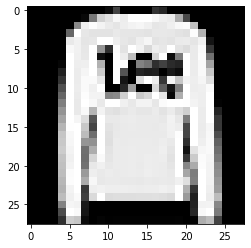

In [39]:
plt.imshow(example_x[1], cmap='gray');

In [40]:
encoder(example_x)

<tfp.distributions.MultivariateNormalDiag 'sequential_3_distribution_lambda_1_MultivariateNormalDiag' batch_shape=[16] event_shape=[2] dtype=float32>

In [41]:
decoder = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(tfpl.IndependentBernoulli.params_size(event_shape)),
    tfpl.IndependentBernoulli(event_shape)
])

In [42]:
decoder(tf.random.normal([16, latent_size]))

<tfp.distributions.Independent 'sequential_4_independent_bernoulli_1_IndependentBernoulli_Independentsequential_4_independent_bernoulli_1_IndependentBernoulli_Bernoulli' batch_shape=[16] event_shape=[28, 28] dtype=float32>

In [43]:
prior = tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))

In [44]:
tfd.kl_divergence(encoder(example_x), prior)

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.07417777, 0.55955434, 0.5260936 , 0.23515067, 0.16280553,
       0.31704846, 0.14006263, 0.16227464, 0.02685243, 0.12934752,
       0.28855097, 0.02619898, 0.14774853, 0.2700674 , 0.6936512 ,
       0.22111651], dtype=float32)>

The loss function we need to estimate is

\begin{equation}
-\mathrm{ELBO} = \mathrm{KL}[ \ q(z|x) \ || \ p(z) \ ] - \mathrm{E}_{Z \sim q(z|x)}[\log p(x|Z)]\\
\end{equation}

where $x = (x_1, x_2, \ldots, x_n)$ refers to all observations, $z = (z_1, z_2, \ldots, z_n)$ refers to corresponding latent variables.

Assumed independence of examples implies that we can write this as

\begin{equation}
\sum_j \mathrm{KL}[ \ q(z_j|x_j) \ || \ p(z_j) \ ] - \mathrm{E}_{Z_j \sim q(z_j|x_j)}[\log p(x_j|Z_j)]
\end{equation}

In [45]:
def loss_analytical(
    x: tf.Tensor, 
    encoding_dist: tfd.Distribution, 
    sampled_decoding_dist: tfd.Distribution, 
    prior: tfd.Distribution,
):
    """
    Batch size of x and encoding_dist/sampled_decoding_dist are the same.
    """
    kl_loss = tfd.kl_divergence(encoding_dist, prior)
    reconstruction_loss = sampled_decoding_dist.log_prob(x) # p_{thera}(x|z)
    
    return tf.reduce_sum(kl_loss - reconstruction_loss)


def loss_approximate(
    x: tf.Tensor, 
    encoding_dist: tfd.Distribution, 
    sampled_decoding_dist: tfd.Distribution,
    prior: tfd.Distribution, 
    sampled_z: tf.Tensor,
):
    reconstruction_loss = sampled_decoding_dist.log_prob(x) # p_{thera}(x|z)
    kl_loss = encoding_dist.log_prob(sampled_z) - prior.log_prob(sampled_Z)

    return tf.reduce_sum(kl_loss - reconstruction_loss)

In [46]:
@tf.function
def get_loss_and_grads(x, loss=loss_analytical):
    with tf.GradientTape() as tape:
        encoding_dist = encoder(x)
        sampled_z = encoding_dist.sample()
        sample_decoding_dist = decoder(sampled_z)
        current_loss = loss(x, encoding_dist, sample_decoding_dist, prior)
    
    grads = tape.gradient(current_loss, encoder.trainable_variables + decoder.trainable_variables)
    return current_loss, grads

In [47]:
# Compile and train the model

num_epochs = 5
opt = tf.keras.optimizers.Adam()
for i in range(num_epochs):
    for train_batch in x_train:
        current_loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables
                                       + decoder.trainable_variables))
        
    print('-ELBO after epoch {}: {:.0f}'.format(i+1, current_loss.numpy()))

-ELBO after epoch 1: 8959
-ELBO after epoch 2: 8815
-ELBO after epoch 3: 8763
-ELBO after epoch 4: 8730
-ELBO after epoch 5: 8888


In [48]:
def vae(inputs, sample=True):
    approx_posterior = encoder(inputs)
    decoding_dist = decoder(approx_posterior.sample())
    if sample:
        return decoding_dist.sample()
    return decoding_dist.mean()

In [49]:
example_reconstruction_sample = vae(example_x).numpy().squeeze()
example_reconstruction_mean = vae(example_x, sample=False).numpy().squeeze()

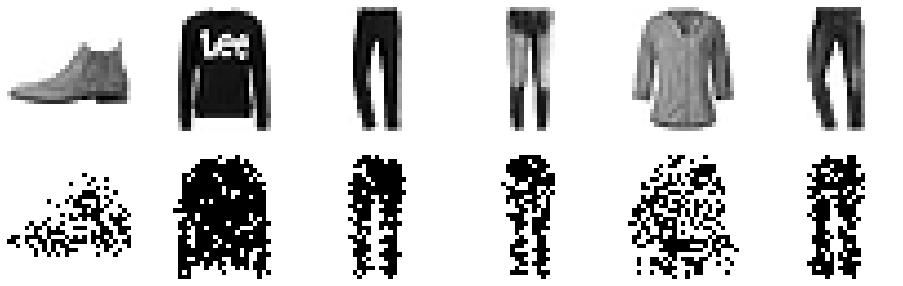

In [50]:
# Plot examples against reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction_sample[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

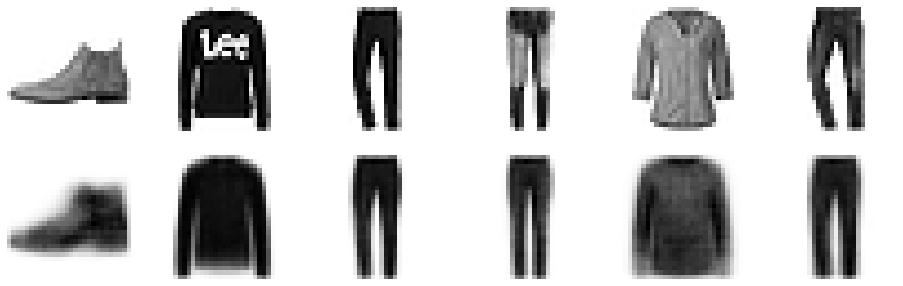

In [51]:
# Plot examples against reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction_mean[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

In [52]:
z = prior.sample(6)
generated_x = decoder(z).sample()

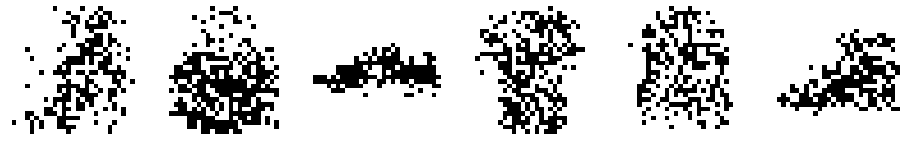

In [53]:
# Display generated_x

f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

In [54]:
z = prior.sample(6)
generated_x = decoder(z).mean()

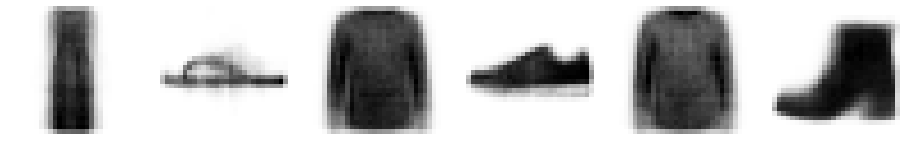

In [55]:
# Display generated_x

f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

#### Using KL layer

In [58]:
latent_size = 4
prior = tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))

event_shape = (28, 28)

encoder = Sequential([
    Flatten(input_shape=event_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
    tfpl.MultivariateNormalTriL(latent_size),
    tfpl.KLDivergenceAddLoss(
        prior,
        use_exact_kl=False,
        test_points_fn=lambda q: q.sample(10),
        test_points_reduce_axis=0
    ), # estimates KL[q(z|x) || p(z)]
])

"""
Averaging over the sample and summing over the batch

(n_sample, batch_size, dim_z)
z_{ij} is the i-th sample for x_j (is at (i, j, :) in tensor of samples)
is mapped to log q(z_{ij}|x_{j}) - log p(_{ij})
=> tensor of KL divergences has shape (n_samples, batch_size)
""";

In [59]:
encoder.losses

[<tf.Tensor 'kl_divergence_add_loss_1/kldivergence_loss/batch_total_kl_divergence:0' shape=() dtype=float32>]

In [60]:
encoder(example_x)

<tfp.distributions.MultivariateNormalTriL 'sequential_6_multivariate_normal_tri_l_1_MultivariateNormalTriL_MultivariateNormalTriL' batch_shape=[16] event_shape=[4] dtype=float32>

In [61]:
encoder.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=21.37426>]

In [62]:
encoder(example_x)

<tfp.distributions.MultivariateNormalTriL 'sequential_6_multivariate_normal_tri_l_1_MultivariateNormalTriL_MultivariateNormalTriL' batch_shape=[16] event_shape=[4] dtype=float32>

In [63]:
encoder.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=24.165216>]

In [100]:
latent_size = 4
prior = tfd.MultivariateNormalDiag(loc=tf.zeros(latent_size))

event_shape = (28, 28)

divergence_regularizer = tfpl.KLDivergenceRegularizer(
    prior,
    use_exact_kl=False,
    test_points_fn=lambda q: q.sample(10),
    test_points_reduce_axis=0
)

encoder2 = Sequential([
    Flatten(input_shape=event_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(tfpl.MultivariateNormalTriL.params_size(latent_size)),
    tfpl.MultivariateNormalTriL(latent_size, activity_regularizer=divergence_regularizer),
])

In [101]:
encoder2.losses

[<tf.Tensor 'multivariate_normal_tri_l_12/ActivityRegularizer/truediv:0' shape=() dtype=float32>,
 <tf.Tensor 'multivariate_normal_tri_l_12/ActivityRegularizer/truediv_1:0' shape=() dtype=float32>]

In [102]:
encoder2(example_x)

<tfp.distributions.MultivariateNormalTriL 'sequential_17_multivariate_normal_tri_l_12_MultivariateNormalTriL_MultivariateNormalTriL' batch_shape=[16] event_shape=[4] dtype=float32>

In [103]:
encoder2.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=0.96935385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0307704>]

In [104]:
# there might be some bug in the implementation of KL loss